In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


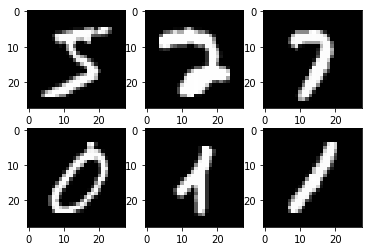

In [118]:
plt.subplot(2,3,1)
plt.imshow(X_train[0],cmap = "gray")

plt.subplot(2,3,2)
plt.imshow(X_train[120],cmap = "gray")

plt.subplot(2,3,3)
plt.imshow(X_train[1300],cmap = "gray")

plt.subplot(2,3,4)
plt.imshow(X_train[3049],cmap = "gray")

plt.subplot(2,3,5)
plt.imshow(X_train[3644],cmap = "gray")

plt.subplot(2,3,6)
plt.imshow(X_train[5149],cmap = "gray")

In [119]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [120]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [121]:
X_train.shape

(60000, 28, 28)

In [122]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

classifier = Sequential() 
classifier.add(Flatten(input_shape = (28,28)))
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(p = 0.3))
classifier.add(Dense(128,activation = "relu"))
classifier.add(Dropout(p = 0.2))
classifier.add(Dense(10,activation = "softmax"))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


/home/tushar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`
  import sys
/home/tushar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
  if __name__ == '__main__':


In [123]:
classifier.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [124]:
from keras.callbacks import ModelCheckpoint,EarlyStopping   

checkpointer = ModelCheckpoint(filepath='mnist_weights.hdf5', save_best_only=True)
earlystopper = EarlyStopping(patience=5)

# train the model
classifier.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[checkpointer,earlystopper])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 16s 343us/step - loss: 0.2723 - acc: 0.9158 - val_loss: 0.1226 - val_acc: 0.9631
Epoch 2/50
48000/48000 [==============================] - 17s 360us/step - loss: 0.1323 - acc: 0.9596 - val_loss: 0.1054 - val_acc: 0.9687
Epoch 3/50
48000/48000 [==============================] - 17s 353us/step - loss: 0.1016 - acc: 0.9685 - val_loss: 0.0887 - val_acc: 0.9742
Epoch 4/50
48000/48000 [==============================] - 17s 356us/step - loss: 0.0846 - acc: 0.9735 - val_loss: 0.0922 - val_acc: 0.9737
Epoch 5/50
48000/48000 [==============================] - 17s 354us/step - loss: 0.0707 - acc: 0.9777 - val_loss: 0.0887 - val_acc: 0.9727
Epoch 6/50
48000/48000 [==============================] - 17s 350us/step - loss: 0.0637 - acc: 0.9804 - val_loss: 0.0994 - val_acc: 0.9723
Epoch 7/50
48000/48000 [==============================] - 17s 361us/step - loss: 0.0572 - acc: 0.9817 - val_loss: 0.

In [125]:
# load the weights that yielded the best validation accuracy
classifier.load_weights('mnist_weights.hdf5')

# evaluate test accuracy
score = classifier.evaluate(X_test, y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.2f%%' % accuracy)

10000/10000 [==============================] - 1s 104us/step
Test accuracy: 98.17%


# Thank You